In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## EDA

<Axes: xlabel='median_house_value', ylabel='Count'>

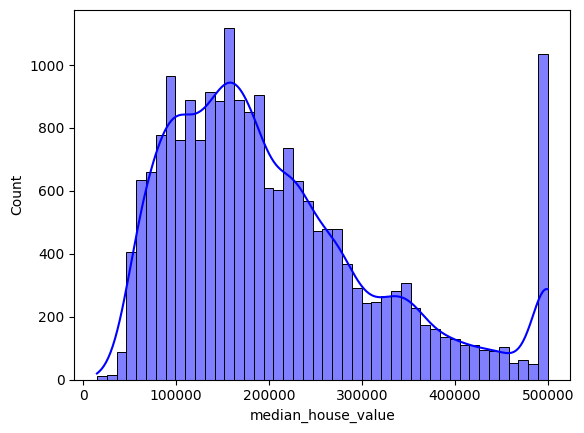

In [4]:
sns.histplot(x = data['median_house_value'], kde=True, color='blue')

##Preparing the dataset

In [5]:
#keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

data_subset = data[data['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [6]:
'''
Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

'''

"\nNext, use only the following columns:\n\n'latitude',\n'longitude',\n'housing_median_age',\n'total_rooms',\n'total_bedrooms',\n'population',\n'households',\n'median_income',\n'median_house_value'\n\n"

In [7]:
data_subset = data_subset[
    ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', 'median_house_value']
]

In [8]:
data_subset.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


## Question 1: There's one feature with missing values. What is it?

A: total_bedrooms


In [7]:
data_subset.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2:What's the median (50% percentile) for variable 'population'?

A: 1195

In [8]:
data_subset['population'].median()

1195.0

###Prepare and split the dataset

Shuffle the initial dataset, use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [9]:
n = len(data_subset)

# get shuffled indexes to split data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# calculate each 20 percentage of dataset for val & test
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# split data
df_train = data_subset.iloc[idx[:n_train]]
df_val = data_subset.iloc[idx[n_train:n_train+n_val]]
df_test = data_subset.iloc[idx[n_train+n_val:]]


# get target columns
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

##Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

R:both

### imputing the mean

In [10]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [11]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [13]:
def prepare_X(df):
    X = imputer.fit_transform(df)

    return X

In [14]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [15]:

X_train = imputer.fit_transform(df_train)


w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [16]:
X_train

array([[ 3.6230e+01, -1.1914e+02,  2.2000e+01, ...,  1.9270e+03,
         5.3000e+02,  2.5875e+00],
       [ 3.4120e+01, -1.1779e+02,  1.6000e+01, ...,  1.3190e+03,
         4.4600e+02,  4.8125e+00],
       [ 3.3680e+01, -1.1797e+02,  2.6000e+01, ...,  1.9300e+03,
         5.8500e+02,  5.7301e+00],
       ...,
       [ 3.4130e+01, -1.1808e+02,  4.6000e+01, ...,  3.7700e+02,
         1.4500e+02,  8.4546e+00],
       [ 3.4290e+01, -1.1846e+02,  2.4000e+01, ...,  3.1510e+03,
         8.1000e+02,  3.0526e+00],
       [ 3.4000e+01, -1.1841e+02,  1.8000e+01, ...,  8.8400e+02,
         4.5600e+02,  2.9338e+00]])

In [17]:
w0

-9.886133215408377

In [18]:
w

array([-2.68652914e-01, -2.57026361e-01,  1.79880767e-03, -3.87631029e-05,
        3.78806885e-04, -1.49641599e-04,  3.25344392e-04,  1.81951358e-01])

In [19]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [20]:
rmse(y_train, y_pred)

0.340030082226426

In [21]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

### imputing 0

In [22]:
n = len(data_subset)

# get shuffled indexes to split data
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

# calculate each 20 percentage of dataset for val & test
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# split data
df_train = data_subset.iloc[idx[:n_train]]
df_val = data_subset.iloc[idx[n_train:n_train+n_val]]
df_test = data_subset.iloc[idx[n_train+n_val:]]


# get target columns
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [23]:
imputer_0 = SimpleImputer(strategy='constant', fill_value=0)

In [24]:
def prepare_X_0(df):
    X = imputer_0.fit_transform(df)

    return X

In [25]:
X_train_2 = imputer_0.fit_transform(df_train)


w0, w = train_linear_regression(X_train_2, y_train)

y_pred = w0 + X_train_2.dot(w)

In [26]:
w0

-9.763249477872478

In [27]:
w

array([-2.68233309e-01, -2.55938802e-01,  1.77710730e-03, -3.38393956e-05,
        2.93766352e-04, -1.52190447e-04,  3.96908643e-04,  1.80600946e-01])

In [28]:
rmse(y_train, y_pred)

0.34027197158295347

In [29]:
X_train_2 = prepare_X_0(df_train)
w0, w = train_linear_regression(X_train_2, y_train)

X_val_2 = prepare_X_0(df_val)
y_pred = w0 + X_val_2.dot(w)
round(rmse(y_val, y_pred),2)

0.34

##Question 4
Now let's train a regularized linear regression.

For this question, fill the NAs with 0.

Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

Use RMSE to evaluate the model on the validation dataset.

Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

A: r=0

In [32]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [41]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [34]:
for r in r_list:
    X_train_2 = prepare_X_0(df_train)
    w0, w = train_linear_regression_reg(X_train_2, y_train, r=r)

    X_val_2 = prepare_X_0(df_val)
    y_pred = w0 + X_val_2.dot(w)
    score = round(rmse(y_val, y_pred),2)

    print(r, w0, score)

0 -9.763249477872478 0.34
1e-06 -9.763228830761964 0.34
0.0001 -9.761185235634128 0.34
0.001 -9.742646249295081 0.34
0.01 -9.56105619328998 0.34
0.1 -8.058889769412012 0.34
1 -3.1331542783180195 0.34
5 -0.84108679750481 0.35
10 -0.43811723158933275 0.35


##Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

A: 0.008

In [35]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = [ ]

In [53]:
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(data_subset)

    # get shuffled indexes to split data
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    # calculate each 20 percentage of dataset for val & test
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    # split data
    df_train = data_subset.iloc[idx[:n_train]]
    df_test = data_subset.iloc[idx[n_train:n_train+n_test]]
    df_val = data_subset.iloc[idx[n_train+n_test:]]


    # get target columns
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']


    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_val_pred = w0 + X_val.dot(w)
    rmse_score = rmse(y_val_pred, y_val)
    print(f"for seed = {seed} the rmse = {rmse_score}")

    rmse_scores.append(rmse_score)

std = round(np.std(np.array(rmse_scores)), 3)
std

for seed = 0 the rmse = 0.3550259407210367
for seed = 1 the rmse = 0.35165229945369486
for seed = 2 the rmse = 0.33305164532594667
for seed = 3 the rmse = 0.3362106105000106
for seed = 4 the rmse = 0.3489859517671496
for seed = 5 the rmse = 0.3335286326395134
for seed = 6 the rmse = 0.3431821708774023
for seed = 7 the rmse = 0.34288307684928165
for seed = 8 the rmse = 0.3376405345629896
for seed = 9 the rmse = 0.3351194197843116


0.008

##Question 6
Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

R:0.3336073994211249

In [47]:
n = len(data_subset)

# get shuffled indexes to split data
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

# calculate each 20 percentage of dataset for val & test
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

# split data
df_train = data_subset.iloc[idx[:n_train]]
df_test = data_subset.iloc[idx[n_train:n_train+n_test]]
df_val = data_subset.iloc[idx[n_train+n_test:]]


# get target columns
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [48]:
train = df_train.append(df_val)

<ipython-input-48-1089669cc26c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = df_train.append(df_val)


In [49]:
Y_train = np.append(y_train, y_val)

In [51]:
X_train = prepare_X(train)
w0, w = train_linear_regression_reg(X_train, Y_train, r=0.001)

X_test = prepare_X(df_test)
y_test_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test_pred, y_test)

In [52]:
rmse_score

0.3336073994211249